









# **Amazon Review Classification Using NLP**

## **Introduction**

Online shopping platforms like Amazon receive millions of customer reviews every day. These reviews contain valuable information about customer satisfaction, product quality, and overall user experience. However, manually analyzing such a large volume of textual data is time-consuming and inefficient.
To address this challenge, review classification using machine learning and natural language processing (NLP) plays an important role.

This project focuses on Amazon Review Classification, where customer reviews are analyzed and classified based on their sentiment or category. The process involves data preprocessing, text vectorization, model training, and evaluation. By automating review classification, businesses can gain faster insights, improve products, and enhance customer satisfaction.

## **Library Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Amazon_Alexa_Reviews.csv')

In [ ]:
df.head()

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4,4.0 out of 5 stars\nAwesome,I liked this gen very much. The only disadvant...,30-Aug-23
1,1,3,3.0 out of 5 stars\nVery Very Average. Very di...,This latest version of Echo Dot may be a bette...,15-Aug-23
2,2,4,4.0 out of 5 stars\ni was not be able to reset...,it could not be possible to reset it at my ne...,21-Aug-23
3,3,4,4.0 out of 5 stars\nHangs a lot,Nothing great then previous ones .,25-Aug-23
4,4,4,4.0 out of 5 stars\nAwesome,AwesomeBut some time can not listenOver all good,14-Aug-23


In [ ]:
df.shape

(90, 5)

In [ ]:
df['Rating'].value_counts()

,count
Rating,
5,38
4,24
3,22
2,4
1,2


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Rating,0
Title,0
Review,1
Review_Date,0


In [ ]:
df['cleaned_review'] = df['Review'].fillna('').apply(clean_text)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import SnowballStemmer
sb = SnowballStemmer('english')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('(?<=[.,!?()])|(?=[.,!?()])', r'\\\\', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('\\d+', '', text)
    text = ' '.join([word for word in str(text).split() if word not in stopwords.words('english')])
    text = re.sub('\\s+', ' ', text).strip()
    text = ' '.join([sb.stem(word) for word in text.split()])
    return text

In [ ]:
display(df[['Review', 'cleaned_review']].head())

,Review,cleaned_review
0,I liked this gen very much. The only disadvant...,like gen much disadvantag found alexa way dumb...
1,This latest version of Echo Dot may be a bette...,latest version echo dot may better version pre...
2,it could not be possible to reset it at my ne...,could possibl reset new locatioon custom help ...
3,Nothing great then previous ones .,noth great previous one
4,AwesomeBut some time can not listenOver all good,awesomebut time listenov good


In [ ]:
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(max_words=1000, width=800, height=800, min_font_size=10 , background_color='white')

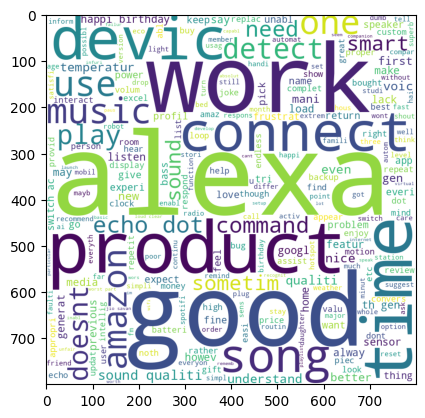

In [ ]:
wc = wc.generate(df['cleaned_review'].str.cat(sep=" "))
plt.imshow(wc)

In [ ]:
def get_genre(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Genre'] = df['Rating'].apply(get_genre)

print(df['Genre'].value_counts())

Genre
Positive    62
Neutral     22
Negative     6
Name: count, dtype: int64


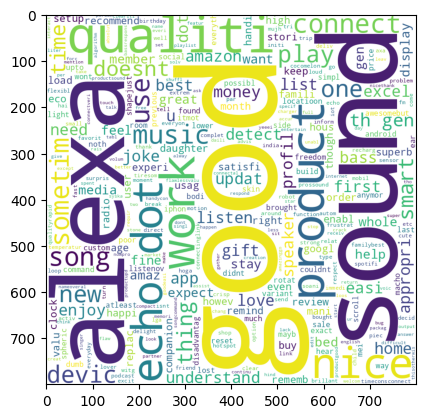

In [ ]:
wc =wc.generate(df[df['Genre']=='Positive']['cleaned_review'].str.cat(sep=" "))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(df['cleaned_review']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(90, 652)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report

In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(x, y , test_size=0.2 , random_state=22)

In [ ]:
gnb =GaussianNB()

In [ ]:
gnb =GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)
print("accuracy_score :",accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.5555555555555556
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         1
    Positive       1.00      0.67      0.80        15

    accuracy                           0.56        18
   macro avg       0.33      0.22      0.27        18
weighted avg       0.83      0.56      0.67        18



In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train , y_train)
y_pred = mnb.predict(x_test)
print("accuracy_score :",accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.6666666666666666
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         1
    Positive       0.80      0.80      0.80        15

    accuracy                           0.67        18
   macro avg       0.27      0.27      0.27        18
weighted avg       0.67      0.67      0.67        18



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train , y_train)
y_pred = bnb.predict(x_test)
print("accuracy_score :",accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.7777777777777778
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         1
    Positive       0.82      0.93      0.88        15

    accuracy                           0.78        18
   macro avg       0.27      0.31      0.29        18
weighted avg       0.69      0.78      0.73        18



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Sample review
review = ["Nothing great then previous ones"]

# Transform review text
review_vector = cv.transform(review)

333333333333333333333333333333333333333333333333
# Predict
prediction = bnb.predict(review_vector)

print("Predicted Output:", prediction)

Predicted Output: ['Positive']


## **Conclusion**

In this project, we successfully explored the concept of Amazon review classification using machine learning techniques. The raw text data was cleaned and transformed into a machine-readable format, enabling effective model training. The classification model demonstrated how NLP and machine learning can be used to automatically analyze customer opinions at scale.

Overall, this system helps reduce manual effort and provides meaningful insights from customer feedback. With further improvements such as advanced models or larger datasets, the accuracy and performance of review classification can be enhanced, making it highly useful for real-world e-commerce applications.